In [4]:
import pandas as pd
import numpy as np

### CNcodes_2023

In [2]:
CNcodes = pd.read_excel("/Users/omega_macbookpro/Desktop/International_Trade/Dissertation_MRes/Comtrade/Sanctions Docs/EU/Data/CNcodes_v2023.xlsx", dtype={'CN2023': str})
CNcodes['CN6'] = CNcodes['CN2023'].apply(lambda x: x[:6])

In [3]:
# for each HS6 code create a group of corresponding CN codes
CN6codes_agg = pd.DataFrame(CNcodes.groupby(by=['CN6'])['CN2023'].agg(list))
CN6codes_agg.reset_index(inplace=True)
CNcodes_gr = pd.merge(CNcodes, CN6codes_agg, on='CN6', how="outer")
CNcodes_gr['CN6_group'] = CNcodes_gr['CN2023_y'].apply(sorted)
CNcodes_gr.drop(['SU', 'CN2023_y'], axis=1, inplace=True)

In [4]:
CNcodes_gr.loc[CNcodes_gr['CN6'] == '902410']

,CN2023_x,Description,CN6,CN6_group
9326,90241020,Machines and appliances for universal testing ...,902410,"[90241020, 90241040, 90241080]"
9327,90241040,Machines and appliances for testing the hardne...,902410,"[90241020, 90241040, 90241080]"
9328,90241080,Machines and appliances for testing the mechan...,902410,"[90241020, 90241040, 90241080]"


### EUsanct_CNcodes_052024

In [5]:
sanct_exp = pd.read_excel("/Users/omega_macbookpro/Desktop/International_Trade/Dissertation_MRes/Comtrade/Sanctions Docs/EU/Data/EUsanct_CNcodes_052024.xlsx", sheet_name='Export', dtype={'CN2023':str}, parse_dates = ["Date"], date_parser = pd.Timestamp)
sanct_exp.head(2)

,Category,EU code,Control text,CN2023,CN text,Date,Regulation,Source,Full_code,Annex,Number of products within code,Sector,Cancelled,When cancelled,For contrats before,Not apply till,Doubt
0,I. Electronics,X.A.I.001.a,Electronic devices and components.\na. “Microp...,8542.31.11,Electronic multi-component integrated circuits...,2022-02-25,NaN,NaN,0,VII,NaN,NaN,NaN,NaT,NaN,NaN,NaN
1,I. Electronics,X.A.I.001.a,Electronic devices and components.\na. “Microp...,8542.31.19,Electronic integrated circuits as processors a...,2022-02-25,NaN,NaN,0,VII,NaN,NaN,NaN,NaT,NaN,NaN,NaN


In [6]:
sanct_exp_short = sanct_exp[['CN2023', 'Date', 'Full_code', 'Cancelled', 'When cancelled']]
sanct_exp_short = sanct_exp.loc[sanct_exp['Regulation'] != 'Russian Sanctions'] # select only EU sanctions


In [7]:
def exp_HS6_1(code):
    if len(code) > 6: return code[:6]
    else: return code
    
sanct_exp_short['CN2023'] = sanct_exp_short['CN2023'].apply(lambda x: str(x).replace(' ', ''))
sanct_exp_short['CN2023'] = sanct_exp_short['CN2023'].apply(lambda x: str(x).replace('.', ''))

sanct_exp_short['CN6'] = sanct_exp_short['CN2023'].apply(exp_HS6_1)

/Users/omega_macbookpro/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/omega_macbookpro/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/omega_macbookpro/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

In [8]:
# have wierd 3 and 41 length codes: 3 is nan for softwares, 41 is Miscellaneous items
print(sanct_exp_short['CN2023'].apply(len).unique())

sanct_exp_short.loc[sanct_exp_short['CN2023'].apply(len) == 41].head(1) # this HS codes 73-79 are partially covered by sanctions introduced in other sections in the same time;
                                                                # the approach is either 1) ignore or 
                                                                #                        2) to drop from analysis (but this is a large loss as it is eight 2digit codes) or 
                                                                #                        3) to classify these 2digit codes as partially sanctioned and then do analysis on this 2digit level
# take approach 1 and ignore these sanctions for now             

[ 8  3  4  6 41  2]


,Category,EU code,Control text,CN2023,CN text,Date,Regulation,Source,Full_code,Annex,Number of products within code,Sector,Cancelled,When cancelled,For contrats before,Not apply till,Doubt,CN6
579,VIII. Miscellaneous items,X.C.VIII.002.d,High entropy alloys (HEA);,"VariouspossibleHSchapters:73,76,78,79,etc","Alloys can be classified in chapter 72, 73, 74...",2022-04-08,NaN,NaN,0,VII,NaN,NaN,NaN,NaT,NaN,NaN,NaN,Variou


In [9]:
sanct_exp_short = sanct_exp_short.loc[(sanct_exp_short['CN2023'].apply(len) != 3) & (sanct_exp_short['CN2023'].apply(len) != 41)]

In [10]:
print(sanct_exp_short['CN2023'].apply(len).unique())
sanct_exp_short.loc[sanct_exp_short['CN2023'].apply(lambda x: not x.isdigit())] # check that all remaining codes are proper numbers

[8 4 6 2]


,Category,EU code,Control text,CN2023,CN text,Date,Regulation,Source,Full_code,Annex,Number of products within code,Sector,Cancelled,When cancelled,For contrats before,Not apply till,Doubt,CN6


In [11]:
# for CN2023 length == 2 or 4 or 6 or 10:
sanct_exp_short_24610 = sanct_exp_short.loc[sanct_exp_short['CN2023'].apply(lambda x: True if len(x) in [2, 4, 6] else False)] # select 2,4 or 6 digit codes

for i in sanct_exp_short_24610.index: # checked that indices are unique (len(set(sanct_imp_short_24610.index)) == len(sanct_imp_short_24610.index))
    code_length = len(sanct_exp_short_24610.loc[i, 'CN2023'])
    if code_length == 10: sanct_exp_short_24610.loc[i, 'CN6_Full_code'] = 0
    else: sanct_exp_short_24610.loc[i, 'CN6_Full_code'] = sanct_exp_short_24610.loc[i, 'Full_code']

sanct_exp_short_24610_clean = sanct_exp_short_24610[['Date', 'CN6', 'CN6_Full_code']]        

/Users/omega_macbookpro/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/Users/omega_macbookpro/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [12]:
# for CN2023 length == 8:
sanct_exp_short_8 = sanct_exp_short.loc[sanct_exp_short['CN2023'].apply(len) == 8] # select 8digit codes
sanct_exp_short_8_full = sanct_exp_short_8.loc[sanct_exp_short_8['Full_code'] == 1] # select 8digit fully sanctioned code to have nan for non-fully sanctioned after matching


In [220]:
# sanct_exp_short_8_full_mm = pd.merge(sanct_exp_short_8_full_m, sanct_exp_short_8_full_agg, 
#                                     left_on=['Date', 'CN6'], right_on=['Date', 'CN6'], how="left")
#sanct_exp_short_8_full_agg
#sanct_exp_short_8_full_agg['Date'][0].to_pydatetime()
#.apply(type).unique()

#sanct_exp_short_8_full_m['Date'].apply(type)

#.apply(lambda x: pd.to_datetime(x, format='%Y%m')) # convert to timestamp
#sanct_exp_short_8_full_agg['Date'].apply()

#sanct_exp_short_8_full_agg['Date'] = 
#pd.Series(sanct_exp_short_8_full_agg['Date'].dt.to_pydatetime())
#sanct_exp_short_8_full_agg['Date'][0]

#sanct_exp_short_8_full_m.loc[sanct_exp_short_8_full_m['CN2023'] == "90241000"]
#sanct_exp_short_8_full_agg.loc[sanct_exp_short_8_full_agg['CN6'] == '902410']
#sanct_exp_short_8_full_agg

In [13]:
# merge 8digit sanctioned codes with their groups of CN8 codes on 6digit level
sanct_exp_short_8_full_m = pd.merge(sanct_exp_short_8_full, CNcodes_gr[['CN2023_x', 'CN6_group']], 
                                    left_on='CN2023', right_on='CN2023_x', how="left") # add column of CN6 groups of CN8 code
sanct_exp_short_8_full_agg = pd.DataFrame(sanct_exp_short_8_full.groupby(['Date', 'CN6'])['CN2023'].agg(list)) # table of CN8 groups per date
sanct_exp_short_8_full_agg.reset_index(inplace=True)
sanct_exp_short_8_full_agg.rename(columns={"CN2023": "CN6_group_sanct"}, inplace=True)
#sanct_exp_short_8_full_agg['Date'] = sanct_exp_short_8_full_agg['Date'].dt.to_pydatetime()

# merge sanctioned table containing benchmark groups with table of actual groups of CN8 codes in sanctioned table
sanct_exp_short_8_full_mm = pd.merge(sanct_exp_short_8_full_m, sanct_exp_short_8_full_agg, 
                                    left_on=['Date', 'CN6'], right_on=['Date', 'CN6'], how="left")
sanct_exp_short_8_full_mm['CN6_group_sanct'] = sanct_exp_short_8_full_mm['CN6_group_sanct'].apply(sorted) # sort codes withing group to check equality with CN6_group
sanct_exp_short_8_full_mm['CN6_Full_code'] = sanct_exp_short_8_full_mm['CN6_group'] == sanct_exp_short_8_full_mm['CN6_group_sanct']


In [14]:
sanct_exp_short_8_clean = sanct_exp_short_8_full_mm.append(sanct_exp_short_8.loc[sanct_exp_short_8['Full_code'] != 1], ignore_index = True) # add partially sanctioned 8digit codes back
sanct_exp_short_8_clean['CN6_Full_code'] = sanct_exp_short_8_clean['CN6_Full_code'].apply(lambda x: 1 if x==True else 0)
sanct_exp_short_8_clean = sanct_exp_short_8_clean[['Date', 'CN6', 'CN6_Full_code']]

In [15]:
sanct_exp_short_clean = sanct_exp_short_24610_clean.append(sanct_exp_short_8_clean)

In [266]:
#sanct_imp_short_agg = pd.DataFrame(sanct_imp_short.groupby(['Date', 'CN6'])['CN2023'].agg(list))
#sanct_exp_short_8_clean['CN6'].duplicated().sum()
#sanct_exp_short_24610.shape[0] + sanct_exp_short_8.shape[0] == sanct_exp_short.shape[0] # another check
#sanct_exp_short_clean.shape[0] == sanct_exp_short.shape[0] # check no observations lost after cleaning

In [ ]:

#sanct_imp_short_clean['CN6'].duplicated().sum()

In [16]:
# check that there are no fully and simultaneously non-fully sanctioned CN6 codes within same date (otherwise, I need to make full=1 for this code-date observation)
print((sanct_exp_short_clean.groupby(['Date', 'CN6'])['CN6_Full_code'].
 agg(list).reset_index()['CN6_Full_code'].
 apply(set).apply(len) != 1).sum())

# there are 21 such codes => need to clean:

sanct_exp_short_clean = pd.merge(sanct_exp_short_clean, sanct_exp_short_clean.groupby(['Date', 'CN6'])['CN6_Full_code'].agg(sum).reset_index(), 
                                    left_on=['Date', 'CN6'], right_on=['Date', 'CN6'], how="left")

sanct_exp_short_clean['CN6_Full_code_y'] = sanct_exp_short_clean['CN6_Full_code_y'].apply(lambda x: min(x,1))
sanct_exp_short_clean.drop(['CN6_Full_code_x'], axis=1, inplace=True)
sanct_exp_short_clean.rename(columns={"CN6_Full_code_y": "CN6_Full_code"}, inplace=True)

print((sanct_exp_short_clean.groupby(['Date', 'CN6'])['CN6_Full_code'].
 agg(list).reset_index()['CN6_Full_code'].
 apply(set).apply(len) != 1).sum())

#pd.DataFrame(sanct_exp_short_clean.groupby(['Date', 'CN6'])['CN6_Full_code'].agg(list))#['CN6_Full_code'].apply(set).apply(len) > 1#.reset_index()['CN6_Full_code'].apply(set).apply(len) > 1
#sanct_exp_short_clean, sanct_exp_short_clean.groupby(['Date', 'CN6'])['CN6_Full_code'].agg(sum).reset_index()#['CN6_Full_code']

# now it's zero

21
0


In [17]:
# !issue with duplicated codes which transit from not full to full
sanct_exp_short_clean.loc[sanct_exp_short_clean['CN6'].duplicated(keep = False)] 

sanct_exp_short_clean = sanct_exp_short_clean.groupby(['Date', 'CN6']).first().reset_index() # get rid of duplicated within same date-CN6 code group (cleaned for this, thanks to previous section of code)

# sanct_exp_short_clean_issue = sanct_exp_short_clean.groupby(['CN6']).first().reset_index() # get rid of duplicated withing same CN6 code group to leave only first date of sanctions (408 + 17 = 425)

# sanct_exp_short_clean_issue.sort_values(by=['Date'], inplace=True) # sort in chronological order

Issue: there are 245 observations which are repeated in the data with different CN6_Full_code (listed in chronological order): 65 codes are kept partially sanctioned, 68 codes are kept fully sanctioned, 112 codes transit from partial to full, 60 codes transit from full to partial (this is actually not a transition as discussed further). 60 codes transited from full to partial should be coded as not transiting but fully sanctioned which is done further.

In [18]:
# breakdown all duplicates on 0-1,0-1,0-0,1-1:
# this are the observations which repeated in the data with different CN6_Full_code (listed in chronological order)
sanct_exp_short_clean_grCN6 = sanct_exp_short_clean.groupby(['CN6'])['CN6_Full_code'].agg(list).reset_index().loc[
    sanct_exp_short_clean.groupby(['CN6'])['CN6_Full_code'].agg(list).reset_index()['CN6_Full_code'].apply(len) > 1]

sanct_exp_short_clean_grCN6['CN6_Full_code_uniq'] = sanct_exp_short_clean_grCN6['CN6_Full_code'].apply(lambda x: list(dict.fromkeys(x)))
sanct_exp_short_clean_grCN6['CN6_Full_code_0-0'] = sanct_exp_short_clean_grCN6['CN6_Full_code_uniq'].apply(lambda x: (len(x)==1)& (x[0]==0))
sanct_exp_short_clean_grCN6['CN6_Full_code_1-1'] = sanct_exp_short_clean_grCN6['CN6_Full_code_uniq'].apply(lambda x: (len(x)==1)& (x[0]==1))
sanct_exp_short_clean_grCN6['CN6_Full_code_0-1'] = sanct_exp_short_clean_grCN6['CN6_Full_code_uniq'].apply(lambda x: (x[1] - x[0]) == 1 if len(x) >1 else False)
sanct_exp_short_clean_grCN6['CN6_Full_code_1-0'] = sanct_exp_short_clean_grCN6['CN6_Full_code_uniq'].apply(lambda x: (x[1] - x[0]) == -1 if len(x) >1 else False)

# manualy checked that codes which are 1-0 (has 1 first and then 0) represent codes which were fully banned firstly 
# and then/simultaneously partialy banned in other sections of sanctions. That is they don't represent cases where there is a switch from full sanctions to partial.
# I.e. these codes can be coded as full and take the first date:
sanct_exp_short_clean_grCN6['CN6_Full_code_1-1'] = (sanct_exp_short_clean_grCN6['CN6_Full_code_1-1']) | (sanct_exp_short_clean_grCN6['CN6_Full_code_1-0'])


Now, let's get time delta of transition from 0 to 1 for 112 codes transiting from partial to full.  

In [19]:
# select repeated codes and group the corresponding dates into list
sanct_exp_short_clean_grCN_date = sanct_exp_short_clean.groupby(['CN6'])['Date'].agg(list).reset_index().loc[
    sanct_exp_short_clean.groupby(['CN6'])['Date'].agg(list).reset_index()['Date'].apply(len) > 1]
# merge sanct_exp_short_clean_grCN6 with sanct_exp_short_clean_grCN_date to have grouped dates
sanct_exp_short_clean_grCN6 = pd.merge(sanct_exp_short_clean_grCN6, sanct_exp_short_clean_grCN_date, 
                                    on='CN6', how="left")


In [20]:
# get time delta of transition from 0 to 1
for i in sanct_exp_short_clean_grCN6.index:
    if sanct_exp_short_clean_grCN6.loc[i, 'CN6_Full_code_0-1'] == True:
        CN6_Full_codes = sanct_exp_short_clean_grCN6.loc[i, 'CN6_Full_code']
        first_partial = CN6_Full_codes.index(0)
        first_full = CN6_Full_codes.index(1)
        CN6_Full_codes_times = sanct_exp_short_clean_grCN6.loc[i, 'Date']        
        sanct_exp_short_clean_grCN6.loc[i, 'CN6_Full_code_0-1_deltaT'] = (CN6_Full_codes_times[first_full] - CN6_Full_codes_times[first_partial]).days
        sanct_exp_short_clean_grCN6.at[i, 'CN6_Full_code_0-1_deltaT_dates'] = [[CN6_Full_codes_times[first_partial]], [CN6_Full_codes_times[first_full]]]  
        
def tech_1(x):
    if x==x:
        if type(x[0]) == list: return [x[0][0], x[1][0]]
        else: return x
    else: return np.nan
        
#sanct_exp_short_clean_grCN6['CN6_Full_code_0-1_deltaT_dates'] = sanct_exp_short_clean_grCN6['CN6_Full_code_0-1_deltaT_dates'].apply(tech_1)                
        

In [21]:
sanct_exp_short_clean_grCN6['CN6_Full_code_0-1_deltaT_dates'] = sanct_exp_short_clean_grCN6['CN6_Full_code_0-1_deltaT_dates'].apply(tech_1) 


In [360]:
sanct_exp_short_clean_ext = pd.merge(sanct_exp_short_clean, sanct_exp_short_clean_grCN6[['CN6', 'CN6_Full_code_0-0', 'CN6_Full_code_1-1', 'CN6_Full_code_0-1', 'CN6_Full_code_0-1_deltaT', 'CN6_Full_code_0-1_deltaT_dates']], 
                                    on='CN6', how="left")


We've done this for codes which are repeated in the same number of digits. However, this does not consider cases when partially sanctioned codes become fully sanctioned not by including same fully sanctioned code but instead by including later fully sanctioned code with lower number of digits. 

In [264]:
# 4 digit codes transiting from 0 to 1
#sanct_exp_short_clean_grCN6.loc[(sanct_exp_short_clean_grCN6['CN6_Full_code_0-1']) & (sanct_exp_short_clean_grCN6['CN6'].apply(lambda x: len(x)<6))]
# 2 digit codes
#sanct_exp_short_clean_ext.loc[sanct_exp_short_clean_ext['CN6'].apply(len)==2]

# selection = sanct_exp_short_clean_ext.loc[sanct_exp_short_clean_ext['CN6'] == '853340']
# ind = 2251
# selection.loc[ind, 'Date']


#sanct_exp_short_clean_grCN6.loc[sanct_exp_short_clean_grCN6['CN6'] == '890520']
#sanct_exp_short_clean_ext.loc[sanct_exp_short_clean_ext['CN6'] == '890520']
#sanct_exp_short_clean_grCN6


In [24]:
# sanct_exp_short_clean_ext.loc[i, 'CN6_Full_code_0-1_deltaT_dates']
# [[first_partial]], [[first_full]] 
#sanct_exp_short_clean_ext
#type(selection.loc[ind, 'Date'].values[0])#.values[0]#.to_pydatetime()
#sanct_exp_short_clean_ext.loc[i, 'Date'].to_pydatetime()
#sanct_exp_short_clean_ext.loc[i, 'CN6_Full_code_0-1_deltaT_dates'][0][0]  
#selection.loc[ind, 'Date']
#sanct_exp_short_clean_ext.loc[i, 'Date']
# sanct_exp_short_clean_ext.loc[i, 'CN6_Full_code_0-1_deltaT_dates']#[0][0]

In [25]:
#sanct_exp_short_clean_ext.loc[sanct_exp_short_clean_ext['CN6_Full_code_0-1_deltaT_dates'].notna()]

#sanct_exp_short_clean_ext['CN6_Full_code_0-1_deltaT_dates'].apply(lambda x: type(x[0]) if x==x else np.nan).unique()
# sanct_exp_short_clean_grCN6['CN6_Full_code_0-1_deltaT_dates'].apply(lambda x: type(x[0]) if x==x else np.nan).unique()
#sanct_exp_short_clean_grCN6
#sanct_exp_short_clean_ext.loc[3, 'CN6_Full_code_0-1_deltaT_dates']

In [210]:
# sanct_exp_short_clean_ext.index
# i
# #first_partial = 
# #sanct_exp_short_clean_ext.loc[i, 'CN6_Full_code_0-1_deltaT_dates']#[0]               
#sanct_exp_short_clean_ext
#sanct_exp_short_clean_ext.loc[i, 'CN6_Full_code_1-1'] != True

In [361]:
codes_list = sanct_exp_short_clean_ext['CN6'].unique()
# get time delta of transition from 0 to 1
for i in sanct_exp_short_clean_ext.index:
    # if the code is partially sanctioned and not 1-1
    if (sanct_exp_short_clean_ext.loc[i, 'CN6_Full_code'] == 0) & (sanct_exp_short_clean_ext.loc[i, 'CN6_Full_code_1-1'] != True):
        code = sanct_exp_short_clean_ext.loc[i, 'CN6']
        shorter_code = code[:-2]
        if shorter_code in codes_list:
            #k = k + int(sanct_exp_short_clean_ext.loc[sanct_exp_short_clean_ext['CN6'] == shorter_code].shape[0] > 1)
            selection = sanct_exp_short_clean_ext.loc[(sanct_exp_short_clean_ext['CN6'] == shorter_code) & (sanct_exp_short_clean_ext['CN6_Full_code'] ==1)]
            len_rows = selection.shape[0]
            ind = selection.index
            if len_rows == 0:
                sanct_exp_short_clean_ext.loc[i, 'CN6_Full_code_0-1_ld'] = False
            # if there is only one less digit code
            elif len_rows == 1:
                sanct_exp_short_clean_ext.loc[i, 'CN6_Full_code_0-1_ld'] = True
                first_partial = sanct_exp_short_clean_ext.loc[i, 'Date'] # date of first partial sanct (for those with no repetitions)
                first_full = selection.loc[ind, 'Date'] # date of first full sanct
                # if the code is repeated, first_partial = first date in CN6_Full_code_0-1_deltaT_dates
                if type(sanct_exp_short_clean_ext.loc[i, 'CN6_Full_code_0-1_deltaT_dates']) == list:
                    first_partial = sanct_exp_short_clean_ext.loc[i, 'CN6_Full_code_0-1_deltaT_dates'][0]               
                sanct_exp_short_clean_ext.at[i, 'CN6_Full_code_0-1_deltaT_dates_ld'] = [[first_partial], [first_full]]
            #else: sanct_exp_short_clean_ext.loc[i, 'CN6_Full_code_0-1_deltaT_dates_ld'] = 0 # the only code for which selection has more then 1 row is 902620. Clean it manually.

# the only code for which selection has more then 1 row is 902620. Clean it manually.
# sanct_exp_short_clean_ext.loc[sanct_exp_short_clean_ext['CN6_Full_code_0-1_deltaT_dates_ld'] == 0]
sanct_exp_short_clean_ext.loc[sanct_exp_short_clean_ext['CN6'] == '902620', 'CN6_Full_code_0-1_ld'] = True
ind = sanct_exp_short_clean_ext[sanct_exp_short_clean_ext['CN6'] == '902620'].index[0]
#first_partial = sanct_exp_short_clean_ext.loc[sanct_exp_short_clean_ext['CN6_Full_code_0-1_deltaT_dates_ld'] == 0, 'Date'].values[0]
first_partial = sanct_exp_short_clean_ext.loc[ind, 'Date']
first_full = sanct_exp_short_clean_ext.loc[sanct_exp_short_clean_ext['CN6'] == '9026', 'Date'].values[0]
sanct_exp_short_clean_ext.at[ind, 'CN6_Full_code_0-1_deltaT_dates_ld'] = [[first_partial], [first_full]]       

/Users/omega_macbookpro/opt/anaconda3/lib/python3.7/site-packages/pandas/core/dtypes/missing.py:516: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  val = np.array(val, copy=False)
/Users/omega_macbookpro/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)
/Users/omega_macbookpro/opt/anaconda3/lib/python3.7/site-packages/pandas/core/internals/blocks.py:966: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is 

In [362]:
# The remaining case to consider is when partially sanctioned 6digit code becomes fully sanctioned by including a fully sanctioned 2digit code.
# There are 3 fully sanctioned 2digit codes: 88, 98 and 72. There are no 6digit codes covered by 88 and 98. 
# The only partially sanctioned 6digit code covered by these codes for which full sanctions are not earlier than introduction of 72 code is 720521.
# sanct_exp_short_clean_ext.loc[sanct_exp_short_clean_ext['CN6'].apply(len) == 2]

sanct_exp_short_clean_ext.loc[sanct_exp_short_clean_ext['CN6'] == '720521', 'CN6_Full_code_0-1_ld'] = True
ind = sanct_exp_short_clean_ext[sanct_exp_short_clean_ext['CN6'] == '720521'].index[0]
first_partial = sanct_exp_short_clean_ext.loc[ind, 'Date']
first_full = sanct_exp_short_clean_ext.loc[sanct_exp_short_clean_ext['CN6'] == '72', 'Date'].values[0]
sanct_exp_short_clean_ext.at[ind, 'CN6_Full_code_0-1_deltaT_dates_ld'] = [[first_partial], [first_full]]       

In [363]:
# do technical stuff: format the dates and compute time new difference

a = sanct_exp_short_clean_ext.loc[sanct_exp_short_clean_ext['CN6'] == '370500', 'CN6_Full_code_0-1_deltaT_dates_ld'].values[0]
type(a[1])

def tech_2(dates):
    output = []
    def reemovNestings(l):
        for i in l:
            if type(i) == list:
                reemovNestings(i)
            else:
                if type(i) == type(a[1]): output.append(i.item())
                else: output.append(i)
    if dates == dates:     
        reemovNestings(dates)
        return [output[0], output[1]]
    else: return np.nan

def tech_3(dates):
    if dates == dates:
        output = []
        for i in dates:
            if type(i) != type(a[1].item()): output.append(pd.Timestamp(i))
            else: output.append(i)
        return output
    else: return np.nan    


In [364]:
sanct_exp_short_clean_ext['CN6_Full_code_0-1_deltaT_dates_ld_cl'] = sanct_exp_short_clean_ext['CN6_Full_code_0-1_deltaT_dates_ld'].apply(tech_2) # get rid of nested lists    
sanct_exp_short_clean_ext['CN6_Full_code_0-1_deltaT_dates_ld_cl'] = sanct_exp_short_clean_ext['CN6_Full_code_0-1_deltaT_dates_ld_cl'].apply(tech_3) # convert 64datetime to Timestamp
sanct_exp_short_clean_ext['CN6_Full_code_0-1_deltaT_ld_cl'] = sanct_exp_short_clean_ext['CN6_Full_code_0-1_deltaT_dates_ld_cl'].apply(lambda x: (x[1] - x[0]).days if x==x else np.nan) # compute time difference

# more cleaning 
sanct_exp_short_clean_ext['CN6_Full_code_0-1'] = sanct_exp_short_clean_ext['CN6_Full_code_0-1'].apply(lambda x: False if x!=x else x)
sanct_exp_short_clean_ext['CN6_Full_code_0-1_ld'] = sanct_exp_short_clean_ext['CN6_Full_code_0-1_ld'].apply(lambda x: False if x!=x else x)
sanct_exp_short_clean_ext['CN6_Full_code_0-1_proper'] = sanct_exp_short_clean_ext['CN6_Full_code_0-1'] + sanct_exp_short_clean_ext['CN6_Full_code_0-1_ld']


/Users/omega_macbookpro/opt/anaconda3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:205: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  f"evaluating in Python space because the {repr(op_str)} "


In [365]:
# sanct_exp_short_clean_ext['CN6_Full_code_0-1_proper'] = sanct_exp_short_clean_ext['CN6_Full_code_0-1'] + sanct_exp_short_clean_ext['CN6_Full_code_0-1_ld']
# sanct_exp_short_clean_ext['CN6_Full_code_0-1_proper'] = sanct_exp_short_clean_ext['CN6_Full_code_0-1_proper'].apply(lambda x: x > 1 if x==x else np.nan)
# sanct_exp_short_clean_ext.loc[sanct_exp_short_clean_ext['CN6'] == '220710']
#sanct_exp_short_clean_ext.loc[sanct_exp_short_clean_ext['CN6'] == '890520']


In [366]:
for i in sanct_exp_short_clean_ext.index:
    if (sanct_exp_short_clean_ext.loc[i, 'CN6_Full_code_0-1_proper'] == False):
        if (pd.isna(sanct_exp_short_clean_ext.loc[i, 'CN6_Full_code_0-0']) & pd.isna(sanct_exp_short_clean_ext.loc[i, 'CN6_Full_code_1-1'])):
            if sanct_exp_short_clean_ext.loc[i, 'CN6_Full_code'] == 0:
                sanct_exp_short_clean_ext.loc[i, 'CN6_Full_code_0-0'] = True
                sanct_exp_short_clean_ext.loc[i, 'CN6_Full_code_1-1'] = False
            else:
                sanct_exp_short_clean_ext.loc[i, 'CN6_Full_code_0-0'] = False
                sanct_exp_short_clean_ext.loc[i, 'CN6_Full_code_1-1'] = True
    else:
        sanct_exp_short_clean_ext.loc[i, 'CN6_Full_code_0-0'] = False
        sanct_exp_short_clean_ext.loc[i, 'CN6_Full_code_1-1'] = False        
        
        if pd.notna(sanct_exp_short_clean_ext.loc[i, 'CN6_Full_code_0-1_deltaT']) & pd.notna(sanct_exp_short_clean_ext.loc[i, 'CN6_Full_code_0-1_deltaT_ld_cl']):
            if sanct_exp_short_clean_ext.loc[i, 'CN6_Full_code_0-1_deltaT'] <=  sanct_exp_short_clean_ext.loc[i, 'CN6_Full_code_0-1_deltaT_ld_cl']:
                sanct_exp_short_clean_ext.loc[i, 'CN6_Full_code_0-1_deltaT_proper'] = sanct_exp_short_clean_ext.loc[i, 'CN6_Full_code_0-1_deltaT']
                sanct_exp_short_clean_ext.loc[i, 'CN6_Full_code_0-1_date_firstpartial'] = sanct_exp_short_clean_ext.loc[i, 'CN6_Full_code_0-1_deltaT_dates'][0]
                sanct_exp_short_clean_ext.loc[i, 'CN6_Full_code_0-1_date_firstfull'] = sanct_exp_short_clean_ext.loc[i, 'CN6_Full_code_0-1_deltaT_dates'][1]                
            else: 
                sanct_exp_short_clean_ext.loc[i, 'CN6_Full_code_0-1_deltaT_proper'] = sanct_exp_short_clean_ext.loc[i, 'CN6_Full_code_0-1_deltaT_ld_cl']
                sanct_exp_short_clean_ext.loc[i, 'CN6_Full_code_0-1_date_firstpartial'] = sanct_exp_short_clean_ext.loc[i, 'CN6_Full_code_0-1_deltaT_dates_ld_cl'][0]
                sanct_exp_short_clean_ext.loc[i, 'CN6_Full_code_0-1_date_firstfull'] = sanct_exp_short_clean_ext.loc[i, 'CN6_Full_code_0-1_deltaT_dates_ld_cl'][1]

        elif pd.notna(sanct_exp_short_clean_ext.loc[i, 'CN6_Full_code_0-1_deltaT']):        
            sanct_exp_short_clean_ext.loc[i, 'CN6_Full_code_0-1_deltaT_proper'] = sanct_exp_short_clean_ext.loc[i, 'CN6_Full_code_0-1_deltaT']            
            sanct_exp_short_clean_ext.loc[i, 'CN6_Full_code_0-1_date_firstpartial'] = sanct_exp_short_clean_ext.loc[i, 'CN6_Full_code_0-1_deltaT_dates'][0]
            sanct_exp_short_clean_ext.loc[i, 'CN6_Full_code_0-1_date_firstfull'] = sanct_exp_short_clean_ext.loc[i, 'CN6_Full_code_0-1_deltaT_dates'][1]                
                        
        elif pd.notna(sanct_exp_short_clean_ext.loc[i, 'CN6_Full_code_0-1_deltaT_ld_cl']):        
            sanct_exp_short_clean_ext.loc[i, 'CN6_Full_code_0-1_deltaT_proper'] = sanct_exp_short_clean_ext.loc[i, 'CN6_Full_code_0-1_deltaT_ld_cl']            
            sanct_exp_short_clean_ext.loc[i, 'CN6_Full_code_0-1_date_firstpartial'] = sanct_exp_short_clean_ext.loc[i, 'CN6_Full_code_0-1_deltaT_dates_ld_cl'][0]
            sanct_exp_short_clean_ext.loc[i, 'CN6_Full_code_0-1_date_firstfull'] = sanct_exp_short_clean_ext.loc[i, 'CN6_Full_code_0-1_deltaT_dates_ld_cl'][1] 


In [430]:
sanct_exp_refin = sanct_exp_short_clean_ext[['Date', 'CN6', 'CN6_Full_code_0-0',
       'CN6_Full_code_1-1', 'CN6_Full_code_0-1_proper',
       'CN6_Full_code_0-1_deltaT_proper',
       'CN6_Full_code_0-1_date_firstpartial',
       'CN6_Full_code_0-1_date_firstfull']]


In [368]:
# check that each code is either 0-0, 1-1 or 0-1
print((sanct_exp_refin['CN6_Full_code_0-0'] == True).sum() + (sanct_exp_refin['CN6_Full_code_1-1'] == True).sum() + (sanct_exp_refin['CN6_Full_code_0-1_proper'] == True).sum())


#sanct_exp_short_clean_ext.loc[:20]
# check there are no intersections in codes b/w the 0-0, 1-1, 0-1 groups
print(sanct_exp_refin.loc[sanct_exp_refin['CN6_Full_code_0-0'] == True, ['CN6']].duplicated(keep=False).sum())
print(sanct_exp_refin.loc[sanct_exp_refin['CN6_Full_code_1-1'] == True, ['CN6']].duplicated(keep=False).sum())
print(sanct_exp_refin.loc[sanct_exp_refin['CN6_Full_code_0-1_proper'] == True, 'CN6'].duplicated(keep=False).sum())

sanct_exp_refin['CN6'].duplicated(keep=False).sum()

# b = sanct_exp_refin.loc[sanct_exp_refin['CN6_Full_code_0-1_proper'] == True, 'CN6'].values
# c = sanct_exp_refin.loc[sanct_exp_refin['CN6_Full_code_0-0'] == True, 'CN6'].values
# d = sanct_exp_refin.loc[sanct_exp_refin['CN6_Full_code_1-1'] == True, 'CN6'].values

# [x for x in d if x in b]


2256
107
149
312


568

In [435]:
#sanct_exp_refin.loc[sanct_exp_refin['CN6'] == '220710']

In [432]:
sanct_exp_refin.sort_values('Date', ascending=True, ignore_index=True, inplace=True)
sanct_exp_refin = sanct_exp_refin.groupby(['CN6']).first().reset_index() # get rid of duplicated withing same CN6 code group to leave only first date of sanctions


In [433]:
# There is one code which denoted as 0-1, which is actually 1-1:
sanct_exp_refin.loc[sanct_exp_refin['CN6_Full_code_0-1_deltaT_proper']<=0]
# clean it
sanct_exp_refin.loc[sanct_exp_refin['CN6'] == '282520', 'CN6_Full_code_1-1'] = True
sanct_exp_refin.loc[sanct_exp_refin['CN6'] == '282520', 'CN6_Full_code_0-1_proper'] = False
sanct_exp_refin.loc[sanct_exp_refin['CN6'] == '282520', ['CN6_Full_code_0-1_deltaT_proper',
       'CN6_Full_code_0-1_date_firstpartial',
       'CN6_Full_code_0-1_date_firstfull']] = [np.nan] * 3

In [437]:
sanct_exp_refin.sort_values('Date', ascending=True, ignore_index=True, inplace=True)

In [440]:
sanct_exp_refin.head(2)

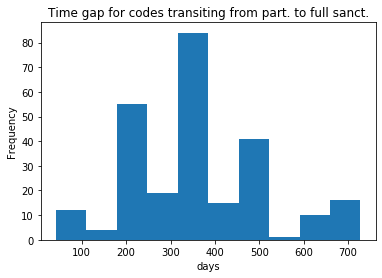

In [442]:
import matplotlib.pyplot as pl
fig = pl.hist(sanct_exp_refin.loc[sanct_exp_refin['CN6_Full_code_0-1_deltaT_proper'].notna(), 'CN6_Full_code_0-1_deltaT_proper'])
pl.title('Time gap for codes transiting from part. to full sanct.')
pl.xlabel("days")
pl.ylabel("Frequency")
pl.savefig("Script_3_P1.png")


In [446]:
#sanct_exp_refin.loc[1500:]

In [ ]:
Next 
- compute issues: 4-digit partially sanctioned codes, transitions - done
- add cancelled 
- new script for HS5-HS6+trade volume analysis

In [510]:
sanct_exp_refin['CN6_len'] = sanct_exp_refin['CN6'].apply(len)

In [509]:
#sanct_exp_refin.to_csv('/Users/omega_macbookpro/Desktop/International_Trade/Dissertation_MRes/Comtrade/Sanctions Docs/EU/Data/Output_Script_3/sanct_exp_refin_v1.csv')


In [507]:
df_a1 = pd.crosstab(sanct_exp_refin['CN6_Full_code_1-1'], sanct_exp_refin['CN6_len'])
df_a2 = pd.crosstab(sanct_exp_refin['CN6_Full_code_0-0'], sanct_exp_refin['CN6_len'])
df_a3 = pd.crosstab(sanct_exp_refin['CN6_Full_code_0-1_proper'], sanct_exp_refin['CN6_len'])
df_a4 = pd.concat([df_a1, df_a2, df_a3], axis=0)
df_a4.index = ['no', 'Full', 'no', 'Partial', 'no', 'PartialToFull']
df_a4 = df_a4.loc[df_a4.index != 'no']
df_a4.loc['Total']= df_a4.sum()
df_a4

CN6_len,2,4,6
Full,2,259,874
Partial,1,9,531
PartialToFull,0,6,251
Total,3,274,1656


In [5]:

sanct_exp_refin = pd.read_csv('/Users/omega_macbookpro/Desktop/International_Trade/Dissertation_MRes/Comtrade/Sanctions Docs/EU/Data/Output_Script_3/sanct_exp_refin_v1.csv')


In [396]:
# sanct_exp_refin.loc[sanct_exp_refin[sanct_exp_refin.columns[1:]].duplicated(keep=False).apply(lambda x: not x) & sanct_exp_refin['CN6'].duplicated(keep=False)]

# sanct_exp_refin.loc[sanct_exp_refin[['CN6', 'CN6_Full_code_0-0', 'CN6_Full_code_1-1',
#        'CN6_Full_code_0-1_proper',
#        'CN6_Full_code_0-1_date_firstpartial',
#        'CN6_Full_code_0-1_date_firstfull']].duplicated(keep=False).apply(lambda x: not x)
#  & sanct_exp_refin['CN6'].duplicated(keep=False)]

# sanct_exp_refin['CN6'].duplicated(keep=False).sum()
# sanct_exp_refin[sanct_exp_refin.columns[1:]].duplicated(keep=False).sum()
# sanct_exp_refin[['CN6', 'CN6_Full_code_0-0', 'CN6_Full_code_1-1',
#        'CN6_Full_code_0-1_proper', 'CN6_Full_code_0-1_deltaT_proper',]].duplicated(keep=False).sum()


In [397]:
#sanct_exp_short_clean_grCN6.loc[sanct_exp_short_clean_grCN6['CN6_Full_code_set'].apply(lambda x: x == [1.0, 0.0])]

#sanct_exp_short_clean_grCN6
# sanct_exp_short_clean_grCN6
# sanct_exp_short_clean_ext
# sanct_exp_short_clean_grCN6
# sanct_exp_short_clean_grCN6.loc[(sanct_exp_short_clean_grCN6['CN6_Full_code_0-1'] == True) | (sanct_exp_short_clean_grCN6['CN6_Full_code_1-0'] == True),'Date'].apply(len)

# sanct_exp_short_clean_grCN6.loc[((sanct_exp_short_clean_grCN6['CN6_Full_code_0-1'] == True) | (sanct_exp_short_clean_grCN6['CN6_Full_code_1-0'] == True)) & (sanct_exp_short_clean_grCN6['CN6_Full_code'].apply(lambda x: len(x) > 2))]

#sanct_exp_short_clean_grCN6.loc[sanct_exp_short_clean_grCN6['CN6_Full_code_0-1'] == True]
#sanct_exp_short_clean_grCN6[(sanct_exp_short_clean_grCN6['Date'].apply(len) > 2) & (sanct_exp_short_clean_grCN6['CN6_Full_code_0-1'] == True)]


#before 290513 is fine, 560130


In [434]:
sanct_exp_refin.loc[sanct_exp_refin['CN6'] == '220710']  # 8504
#sanct_exp_refin

,CN6,Date,CN6_Full_code_0-0,CN6_Full_code_1-1,CN6_Full_code_0-1_proper,CN6_Full_code_0-1_deltaT_proper,CN6_Full_code_0-1_date_firstpartial,CN6_Full_code_0-1_date_firstfull
27,220710,2022-03-15,True,False,False,NaN,NaT,NaT


In [401]:
# (sanct_exp_short_clean.groupby(['Date', 'CN6'])['CN6_Full_code'].
#  agg(list).reset_index()['CN6_Full_code'].
#  apply(set).apply(len) != 1).sum()

# 903089 854330 848220 847989 846610 842490 842489 841360

In [402]:
#sanct_exp_refin.loc[sanct_exp_refin['CN6_Full_code_0-1_proper']==True]



In [399]:
# breakdown all duplicates on 0-1,0-1,0-0,1-1
sanct_exp_short_clean_grCN_date = sanct_exp_short_clean.groupby(['CN6'])['Date'].agg(list).reset_index().loc[
    sanct_exp_short_clean.groupby(['CN6'])['Date'].agg(list).reset_index()['Date'].apply(len) > 1]



In [400]:
# breakdown all duplicates on 0-1,0-1,0-0,1-1
sanct_exp_short_clean.loc[sanct_exp_short_clean['CN6'].duplicated(keep = False)] 
#sanct_exp_short_clean.groupby(['Date', 'CN6'])['CN6_Full_code'].agg(list).reset_index()#['CN6_Full_code']#.apply(len) > 1).sum()


,Date,CN6,CN6_Full_code
1,2022-02-25,282619,0.0
3,2022-02-25,370500,0.0
4,2022-02-25,392010,0.0
5,2022-02-25,700220,0.0
7,2022-02-25,840721,0.0
...,...,...,...
2244,2023-12-19,848230,1.0
2245,2023-12-19,848250,1.0
2248,2023-12-19,850440,1.0
2249,2023-12-19,851779,1.0


In [325]:
sanct_exp_short_clean.loc[sanct_exp_short_clean['CN6'] == '854231']
sanct_exp_short_clean.shape # 3024

(3024, 3)

In [327]:
sanct_exp_short_clean.shape

(2256, 3)

In [ ]:
#sanct_imp_short_clean_issue.to_csv("/Users/omega_macbookpro/Desktop/International_Trade/Dissertation_MRes/Comtrade/Sanctions Docs/EU/Data/sanct_imp_short_clean_issue_v1.csv")
sanct_imp_short_clean_issue.head(2)

In [ ]:
# breakdown all duplicates on 0-1,0-1,0-0,1-1

In [250]:
sanct_exp_short_8.loc[sanct_exp_short_8['Full_code'] != 1]

,Category,EU code,Control text,CN2023,CN text,Date,Regulation,Source,Full_code,Annex,Number of products within code,Sector,Cancelled,When cancelled,For contrats before,Not apply till,Doubt,CN6
0,I. Electronics,X.A.I.001.a,Electronic devices and components.\na. “Microp...,85423111,Electronic multi-component integrated circuits...,2022-02-25,NaN,NaN,0,VII,NaN,NaN,NaN,NaT,NaN,NaN,NaN,854231
1,I. Electronics,X.A.I.001.a,Electronic devices and components.\na. “Microp...,85423119,Electronic integrated circuits as processors a...,2022-02-25,NaN,NaN,0,VII,NaN,NaN,NaN,NaT,NaN,NaN,NaN,854231
2,I. Electronics,X.A.I.001.a,Electronic devices and components.\na. “Microp...,85423190,Electronic integrated circuits as processors a...,2022-02-25,NaN,NaN,0,VII,NaN,NaN,NaN,NaT,NaN,NaN,NaN,854231
3,I. Electronics,X.A.I.001.a,Electronic devices and components.\na. “Microp...,85423911,Other electronic integrated circuits; goods sp...,2022-02-25,NaN,NaN,0,VII,NaN,NaN,NaN,NaT,NaN,NaN,NaN,854239
4,I. Electronics,X.A.I.001.a,Electronic devices and components.\na. “Microp...,85423919,Other electronic integrated circuits; goods sp...,2022-02-25,NaN,NaN,0,VII,NaN,NaN,NaN,NaT,NaN,NaN,NaN,854239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2558,NaN,NaN,NaN,93062900,NaN,2022-10-06,"Pack8, 833/2014, 2aa",https://eur-lex.europa.eu/legal-content/EN/TXT...,0,258/2012 Annex I,NaN,Firearm,NaN,NaT,NaN,NaN,NaN,930629
2559,NaN,NaN,NaN,93032010,NaN,2022-10-06,"Pack8, 833/2014, 2aa",https://eur-lex.europa.eu/legal-content/EN/TXT...,0,258/2012 Annex I,NaN,Firearm,NaN,NaT,NaN,NaN,NaN,930320
2560,NaN,NaN,NaN,93063010,NaN,2022-10-06,"Pack8, 833/2014, 2aa",https://eur-lex.europa.eu/legal-content/EN/TXT...,0,258/2012 Annex I,NaN,Firearm,NaN,NaT,NaN,NaN,NaN,930630
2561,NaN,NaN,Hydraulic oils for the usage in vehicles of Ch...,27101983,NaN,2022-10-06,"Pack8, 833/2014, 3c Annex XI",https://eur-lex.europa.eu/legal-content/EN/TXT...,0,Annex XI,NaN,Aircraft (cont.),NaN,NaT,2022-10-07 00:00:00,2022-11-06 00:00:00,NaN,271019


In [ ]:
df[['CN6', 'Date', 'CN6_Full_code']] = np.nan

sanct_codes = sanct_imp_short_clean_issue['CN6'].values
for i in df.index:
    code = df.loc[i, 'From HS2022']
    if code in sanct_codes: df.loc[i, sanct_imp_short_clean_issue.columns] = sanct_imp_short_clean_issue.loc[sanct_imp_short_clean_issue['CN6'] == code].squeeze(axis=0)
    elif code[:4] in sanct_codes: df.loc[i, sanct_imp_short_clean_issue.columns] = sanct_imp_short_clean_issue.loc[sanct_imp_short_clean_issue['CN6'] == code[:4]].squeeze(axis=0)
    elif code[:2] in sanct_codes: df.loc[i, sanct_imp_short_clean_issue.columns] = sanct_imp_short_clean_issue.loc[sanct_imp_short_clean_issue['CN6'] == code[:2]].squeeze(axis=0) 
    else: df.loc[i, sanct_imp_short_clean_issue.columns] == np.nan 
        
df['Sanct'] = df['Date'].apply(lambda x: int(x==x))  
HS6toHS5 = df.copy()